# FIDS Custom FL

This notebook creates the client for a federated intrusion detection system (FIDS) using a custom class which implemented in our GitHub module. In this implementation, the server is running on a separate runtime and the model parameters are passed using .h5 files saved to a shared Google Drive folder.

# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# download SynCAN dataset repository, combine train files, and clean directory
!git clone https://github.com/etas/SynCAN.git &> /dev/null
%cd /content/SynCAN
!unzip \*.zip -d . &> /dev/null
!cat train_*.csv > train.csv
!rm *.zip &> /dev/null
%cd /content

# download project repository
!git clone https://github.com/brendon-felix/VehicleCybersecFL.git &> /dev/null
!rm ./VehicleCybersecFL/*.ipynb &> /dev/null
!cp -r ./VehicleCybersecFL/anomalydetection/* .
%run anomalydetection.py
%run id_labels.py

/content/SynCAN
/content


In [ ]:
from psutil import virtual_memory
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(f'GPU: {gpu_info[599:619]}')
ram_gb = virtual_memory().total / 1e9
print(f'RAM: {ram_gb:.1f} GB')

GPU: Tesla T4            
RAM: 13.6 GB


In [ ]:
directory = '/content/drive/MyDrive/Senior Design 22-23/Models/'
params = load_params(directory)

# Prepare Data


In [ ]:
train_df = import_data('SynCAN/train.csv', params['msg_id'])

29,669,725 total messages (id1,id2,...,id10)
2,070,144 messages used (id2)
0 anomalous messages out of 2,070,144



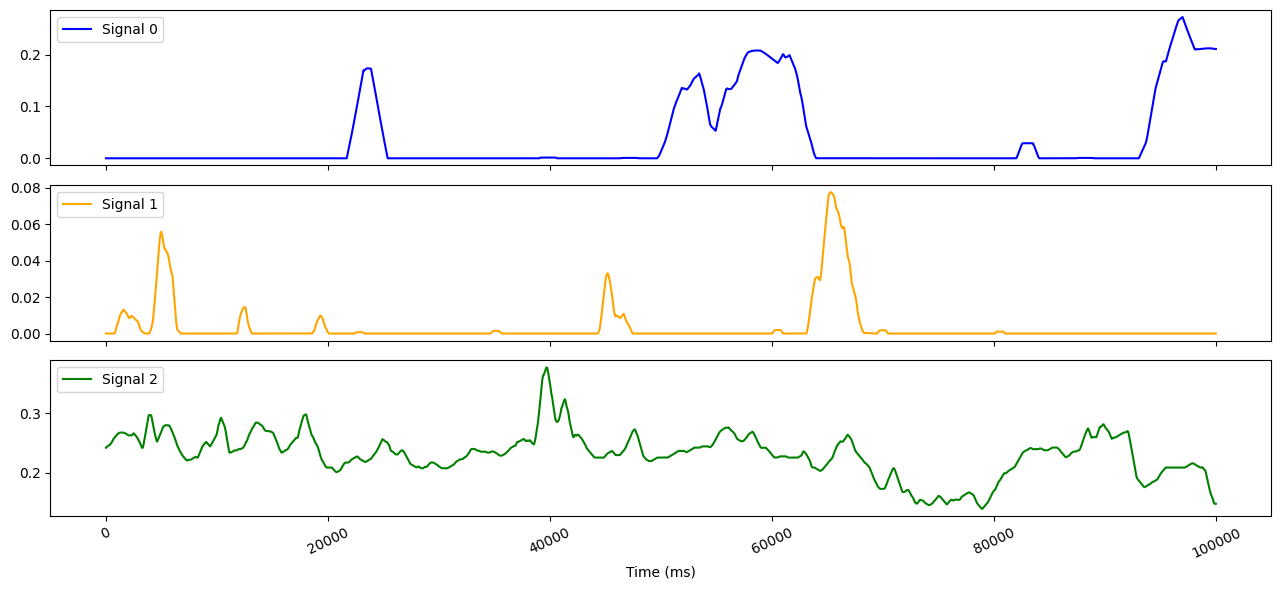

In [ ]:
visualize_data(train_df, end_time=1e5)

# Train and Aggregate

In [ ]:
client = FederatedClient(train_df.iloc[:len(train_df) // 3], params, client_id=0, verbose=True)

344,964 subsequences of length 100
3,450 batches (batch size 100)


In [ ]:
client.run_client()

Starting Client 0...
Iteration 1/10
Training model...
3450/3450 [==============================] - 98s 25ms/step - loss: 0.0182 - mae: 0.0800
Loading global model 1...
Iteration 2/10
Training model...
3450/3450 [==============================] - 85s 25ms/step - loss: 0.0027 - mae: 0.0369
Loading global model 2...
Iteration 3/10
Training model...
3450/3450 [==============================] - 84s 24ms/step - loss: 0.0012 - mae: 0.0240
Loading global model 3...
Iteration 4/10
Training model...
3450/3450 [==============================] - 86s 25ms/step - loss: 9.2537e-04 - mae: 0.0205
Loading global model 4...
Iteration 5/10
Training model...
3450/3450 [==============================] - 86s 25ms/step - loss: 8.9120e-04 - mae: 0.0199
Loading global model 5...
Iteration 6/10
Training model...
3450/3450 [==============================] - 85s 25ms/step - loss: 8.7242e-04 - mae: 0.0196
Loading global model 6...
Iteration 7/10
Training model...
3450/3450 [==============================] - 83s 24m